In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
from __future__ import division
from __future__ import print_function

from pprint import pprint as pp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error

from lib import utils
from lib import cols

In [3]:
sns.set(font_scale=1.5)

In [4]:
df_all_sj, df_all_iq = utils.get_df_all()
df_all_list = [df_all_sj, df_all_iq]

In [5]:
col_orig_feats = cols.ndvi + cols.precipitation + cols.reanalysis + cols.station

In [6]:
for df_all in df_all_list:
    utils.fill_na(df_all)

In [7]:
X_scaled_sj = preprocessing.scale(df_all_sj[col_orig_feats])
X_scaled_iq = preprocessing.scale(df_all_iq[col_orig_feats])

In [8]:
pca_sj = PCA(whiten=False)
pca_iq = PCA(whiten=False)
pca_sj.fit(X_scaled_sj)
pca_iq.fit(X_scaled_iq)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

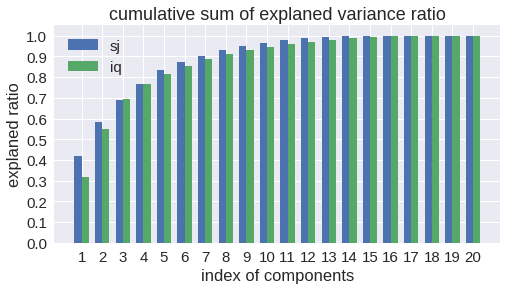

In [9]:
n_component = pca_sj.n_components_
bar_width = 0.35
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, n_component+1) - 0.5*bar_width, np.cumsum(pca_sj.explained_variance_ratio_), bar_width, label="sj")
plt.bar(np.arange(1, n_component+1) + 0.5*bar_width, np.cumsum(pca_iq.explained_variance_ratio_), bar_width, label="iq")
plt.xticks(range(1, n_component+1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("index of components")
plt.ylabel("explaned ratio")
plt.title("cumulative sum of explaned variance ratio")
plt.legend()
plt.savefig("./img/pca_explaine.svg", bbox_inches='tight')

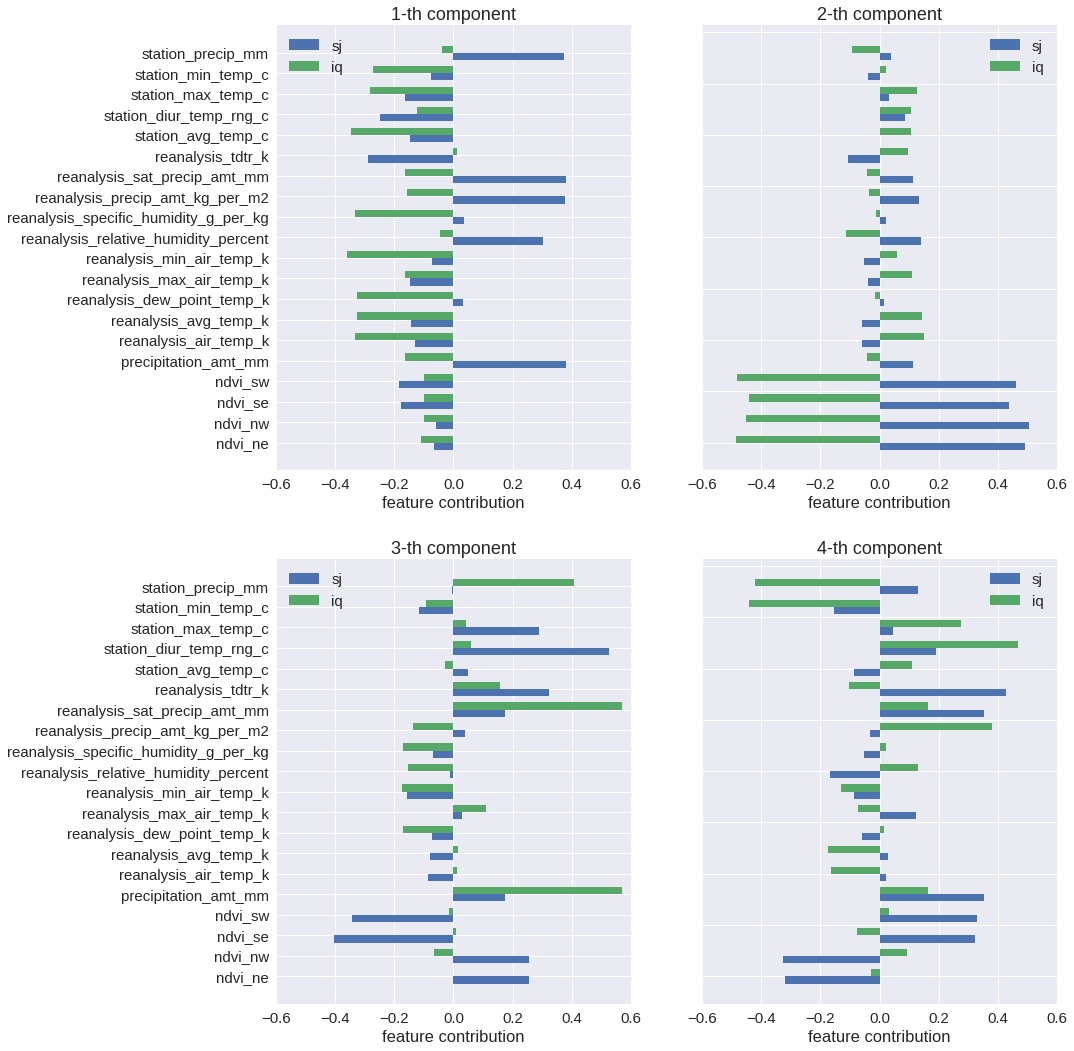

In [10]:
n = 2
xlim = 0.6
bar_width = 0.35
plt.figure(figsize=(14, 18))
for i in range(n):
    comp_i = 2*i + 1
    y_pos = np.arange(20)
    ax = plt.subplot(n, 2, 2*i+1)
    plt.barh(y_pos - 0.5*bar_width, pca_sj.components_[comp_i], bar_width, label='sj')
    plt.barh(y_pos + 0.5*bar_width, pca_iq.components_[comp_i], bar_width, label='iq')
    plt.yticks(y_pos, col_orig_feats)    
    plt.xlabel("feature contribution")
    ax.set_title("%d-th component" % comp_i)
    plt.xlim((-xlim, xlim)) 
    plt.legend()

    comp_i = 2*i + 2
    ax = plt.subplot(n, 2, 2*i+2)
    plt.barh(y_pos - 0.5*bar_width, pca_sj.components_[comp_i], bar_width, label='sj')
    plt.barh(y_pos + 0.5*bar_width, pca_iq.components_[comp_i], bar_width, label='iq')
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.xlabel("feature contribution")
    ax.set_title("%d-th component" % comp_i)
    plt.xlim((-xlim, xlim))
    plt.legend()
#plt.show()

plt.savefig("./img/pca_component_4.svg", bbox_inches='tight')

## Effect of rolling average and time lag

In [11]:
# rolling average
for df_all in df_all_list:
    for col in col_orig_feats:
        df_all["roll4_" + col] = df_all[col].rolling(4, min_periods=1).mean()

col_roll_feats = ["roll4_" + col for col in col_orig_feats]

# add time lag of rolling average 
for df_all in df_all_list:
    utils.calc_lag_column_by_list(df_all, col_roll_feats, [4, 8, 12])
    
col_roll_lag_feats = [col + "_lag{0}".format(i) for col in col_roll_feats for i in [4, 8, 12]]

In [12]:
X_scaled_sj = preprocessing.scale(df_all_sj[12:][col_orig_feats+col_roll_feats+col_roll_lag_feats])
X_scaled_iq = preprocessing.scale(df_all_iq[12:][col_orig_feats+col_roll_feats+col_roll_lag_feats])
pca_sj = PCA(whiten=False)
pca_iq = PCA(whiten=False)
pca_sj.fit(X_scaled_sj)
pca_iq.fit(X_scaled_iq)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

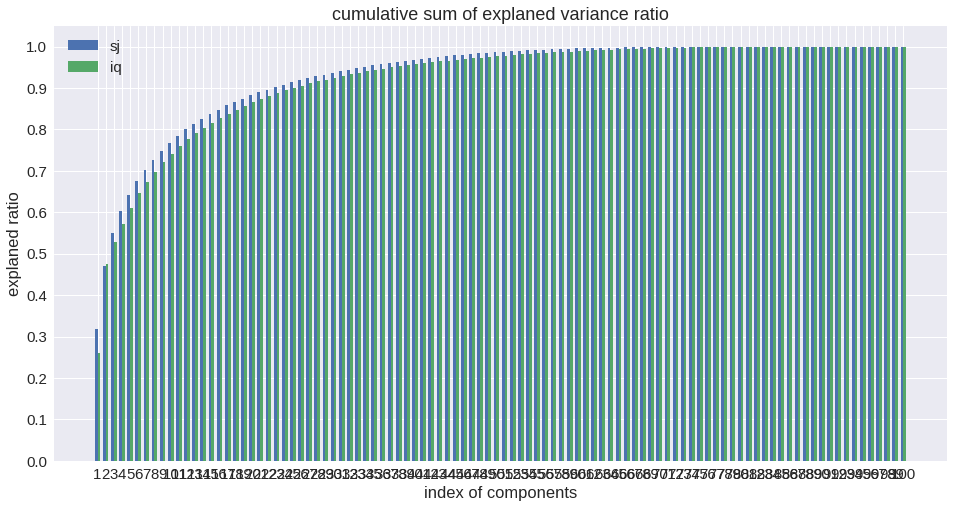

In [13]:
n_component = pca_sj.n_components_
bar_width = 0.35
plt.figure(figsize=(16, 8))
plt.bar(np.arange(1, n_component+1) - 0.5*bar_width, np.cumsum(pca_sj.explained_variance_ratio_), bar_width, label="sj")
plt.bar(np.arange(1, n_component+1) + 0.5*bar_width, np.cumsum(pca_iq.explained_variance_ratio_), bar_width, label="iq")
plt.xticks(range(1, n_component+1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("index of components")
plt.ylabel("explaned ratio")
plt.title("cumulative sum of explaned variance ratio")
plt.legend()